In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
housing = fetch_california_housing()


In [7]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [64]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
df['target'] = housing.target

In [33]:
df.value_counts()

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude  target 
0.4999   10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90    0.55000    1
4.2500   34.0      6.063910   0.996241   631.0       2.372180  38.53     -121.51    1.91900    1
4.2458   52.0      3.912999   1.064483   1830.0      1.873081  37.80     -122.42    4.50000    1
4.2454   33.0      6.073746   1.064897   1073.0      3.165192  34.12     -117.87    1.83800    1
                   4.604207   1.021033   1644.0      3.143403  33.88     -118.36    2.36800    1
                                                                                              ..
2.8919   52.0      5.140506   1.089873   2290.0      2.898734  34.10     -118.14    2.58400    1
2.8917   33.0      4.699346   1.009804   1378.0      4.503268  34.20     -118.37    1.70400    1
2.8913   23.0      5.038674   0.977901   1146.0      3.165746  36.43     -119.85    0.60900    1
2.8910   11.0      3.764323   1.238

In [34]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [35]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [37]:
sns.set(rc={'figure.figsize':(11.7,8.28)})

<ipython-input-38-38009304091d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.target,bins=30)


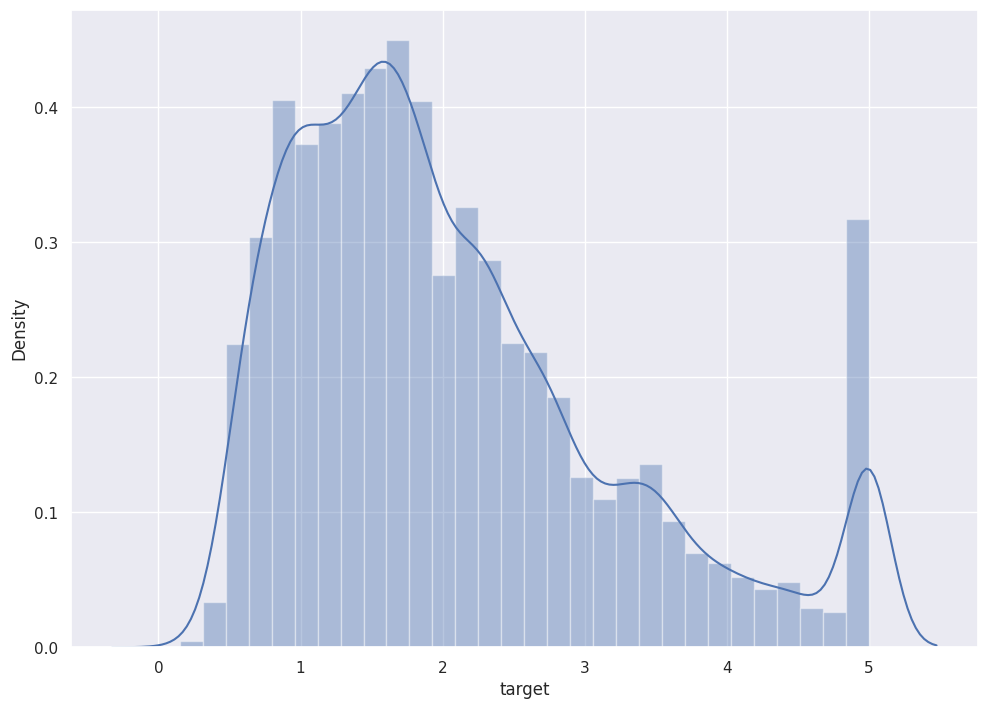

In [38]:
import matplotlib.pyplot as plt
sns.distplot(df.target,bins=30)
plt.show();

In [39]:
corr=df.corr().round(2)
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
target,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


<Axes: >

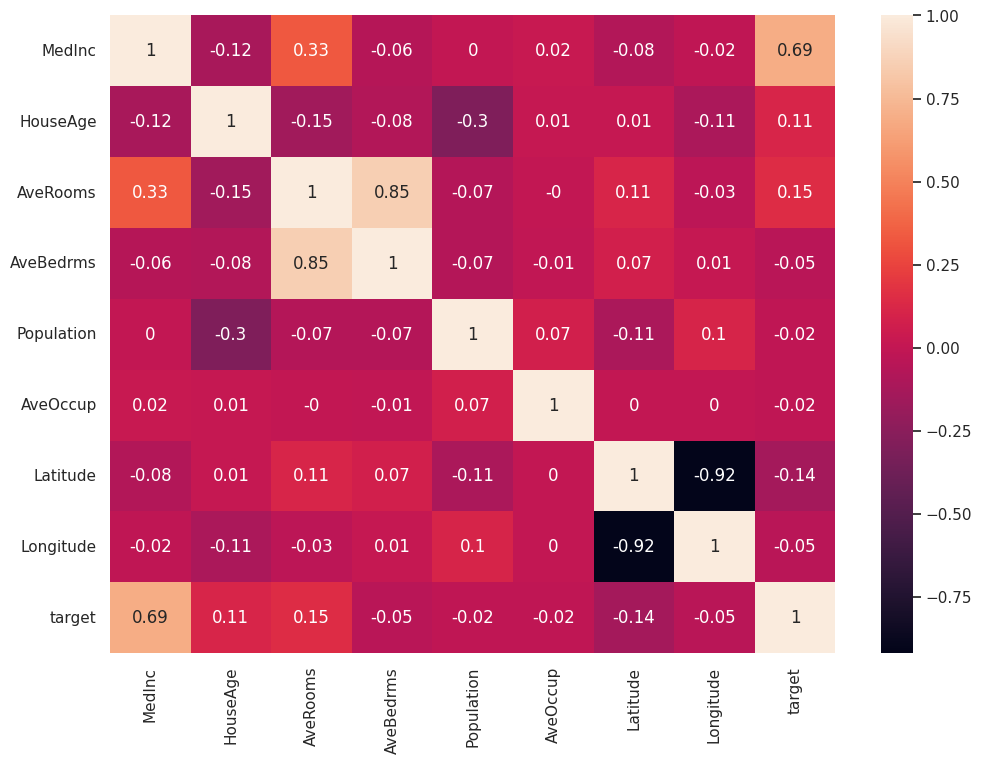

In [40]:
sns.heatmap(corr,annot=True)

In [79]:
X = df['MedInc'].values.reshape(-1, 1)
y = df['target'].values.reshape(-1, 1)


In [80]:
#train test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = LinearRegression()

In [82]:
model.fit(X_train, y_train)


LinearRegression()

In [83]:
# evaluating the model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

In [84]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 0.6991447170182823
Root Mean Squared Error: 0.8361487409655547
R2 Score: 0.47699273458205227


In [85]:
# evealuating the testing set

y_pred_test = model.predict(X_test)
mse_t = mean_squared_error(y_test, y_pred_test)
rmse_t = np.sqrt(mse)
r2_t = r2_score(y_test, y_pred_test)

In [86]:
print("Mean Squared Error:", mse_t)
print("Root Mean Squared Error:", rmse_t)
print("R2 Score:", r2_t)

Mean Squared Error: 0.7091157771765549
Root Mean Squared Error: 0.8361487409655547
R2 Score: 0.45885918903846656


In [73]:
#considering seperate features
target = 'target'
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Loop through each feature and create a Linear Regression model
for feature in features:
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    lr = LinearRegression()
    lr.fit(X_train_feature, y_train)
    y_pred = lr.predict(X_test_feature)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    print(f'{feature}: RMSE = {rmse:.3f}, R^2 = {r2:.3f}')


MedInc: RMSE = 0.832, R^2 = 0.473
HouseAge: RMSE = 1.140, R^2 = 0.011
AveRooms: RMSE = 1.132, R^2 = 0.023
AveBedrms: RMSE = 1.145, R^2 = 0.002
Population: RMSE = 1.145, R^2 = 0.001
AveOccup: RMSE = 1.145, R^2 = 0.001
Latitude: RMSE = 1.133, R^2 = 0.023
Longitude: RMSE = 1.145, R^2 = 0.001


**Summary**


The best predictor is likely to be the feature with the lowest RMSE and highest R^2.

 In this case, 'MedInc' has the lowest RMSE and highest R^2, so it is likely the best predictor. 
 
However, it is important to note that we are only considering each feature separately and not in combination with other features, so further analysis may be necessary to determine the best predictors when considering multiple features together.